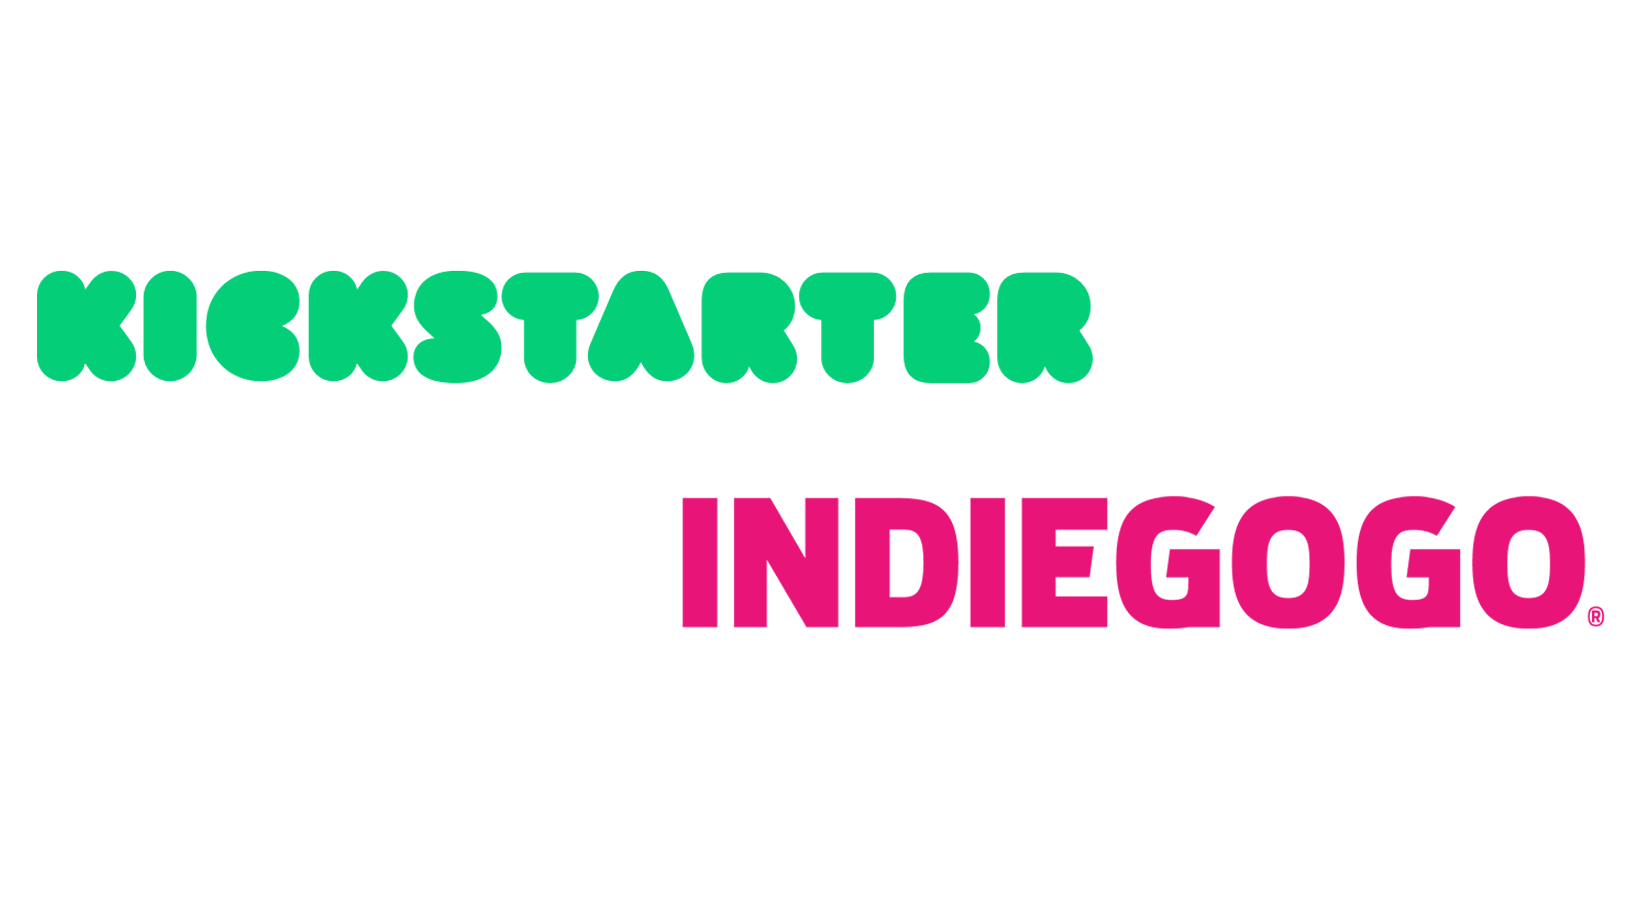

# 0 - Preparing  The Data


importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick

setting variables for files

In [2]:
kickstarter_file='.\ks-projects-201801.csv'
indiegogo_file='.\indiegogo.csv'

creating a test to check if the file exists

In [3]:
if os.path.isfile(kickstarter_file)==False:
    raise(Exception("Kickstarter's File Not Found"))      

loading file

In [4]:
kick_df=pd.read_csv(kickstarter_file)

cleaning columns titles & removing empty rows

In [5]:
kick_df.columns=kick_df.columns.str.strip() 
kick_df.dropna(how='all',axis='rows', inplace=True )

filling empty cells with empty string or 0 depending on the type of column

In [6]:
kick_df['usd_goal_real'].fillna(0, inplace=True)
kick_df['usd_pledged_real'].fillna(0, inplace=True)
kick_df['name'].fillna('', inplace=True)
kick_df['category'].fillna('', inplace=True)
kick_df['main_category'].fillna('', inplace=True)
kick_df['state'].fillna('', inplace=True)
kick_df['country'].fillna('', inplace=True)

determining type for certain colunmns

In [7]:
kick_df['launched']=pd.to_datetime(kick_df['launched'])
kick_df['deadline']=pd.to_datetime(kick_df['deadline'])
kick_df['usd_goal_real']=kick_df['usd_goal_real'].astype(float)
kick_df['usd_pledged_real']=kick_df['usd_pledged_real'].astype(float)

removing corrapted rows

In [8]:
kick_df=kick_df.loc[kick_df['launched'].dt.year>=2009]
kick_df=kick_df.loc[kick_df['deadline'].dt.year>=2009]

# 1 - Status Distribution

creating a pie chart that shows the percentage of each status out of all projects by counting, and setting the design for the chart

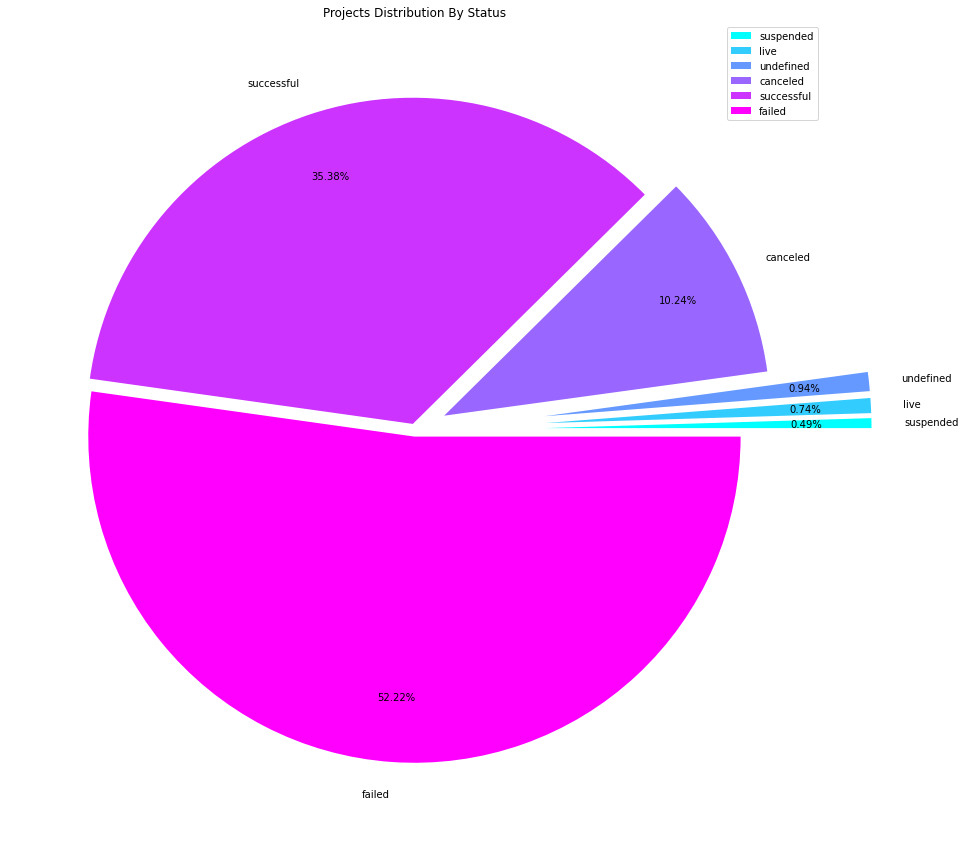

In [9]:
kick_df['state'].value_counts(ascending=True).plot(kind='pie', colormap='cool', figsize=(15,15),autopct='%.2f%%', explode = [0.4, 0.4, 0.4, 0.1 ,0.02 ,0.02],pctdistance=0.8)
plt.title("Projects Distribution By Status")
plt.ylabel("")
plt.legend()
plt.show()

# 2 - Main Category

creating mask for successful projects 

In [10]:
state_s=kick_df['state']=='successful'

creating a pie chart that shows the percentage of each category out of the successful projects by counting, and setting the design for the chart

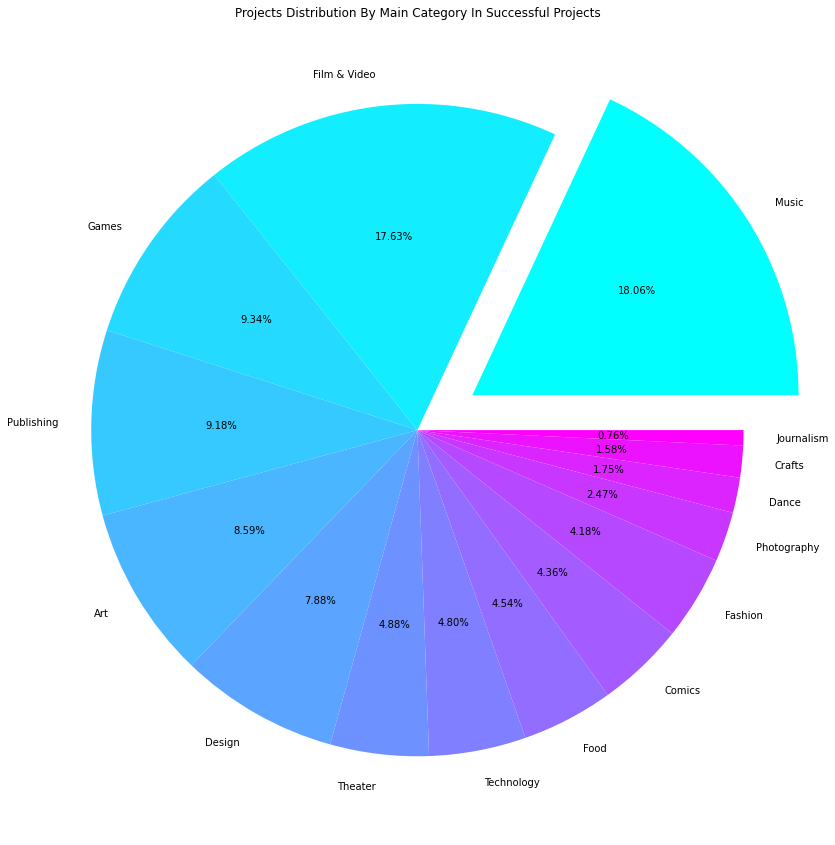

In [11]:
kick_df[state_s]['main_category'].value_counts().plot(kind='pie', colormap='cool', figsize=(15,15),autopct='%.2f%%', explode = [0.2, 0, 0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.title("Projects Distribution By Main Category In Successful Projects")
plt.ylabel("")
plt.show()

# 3 - Goal Amount 

creating function that will go over numbers, check their length, and classify them to one of the categories we made

In [12]:
def categorizing(number):
    number=int(number)
    number_str=(str(number))
    length=len(number_str)
    
    if length==1:
        return ("0-10")
    elif length==2:
        return ("10-100")
    
    elif length==3:
        if number<500:
            return ("100-500")
        else:
            return ("500-1,000")
    
    elif length==4:
        if number<5000:
            return ("1,000-5,000")
        else:
            return ("5,000-10,000")
    
    elif length==5:
        if number<50000:
            return ("10,000-50,000") 
        else:
            return ("50,000-100,000") 
        
    elif length==6:
        return ("100,000-1,000,000")
    
    elif length==7:
        return ("1,000,000-2,050,000")

applying our function on the 'usd_goal_real' column,and creating new column 'goal_range'

In [13]:
kick_df['goal_range']=kick_df['usd_goal_real'].apply(categorizing)

using agg function to get the min, max, mean of the column, in successful projects, and saving them to variables

In [14]:
max_goal,min_goal, mean_goal=kick_df[state_s]['usd_goal_real'].agg(['max','min','mean'])

creating a new variable for the values of each bar chart, that are the future labels and be used with the function and the plot

In [15]:
goal_values=kick_df[state_s]['goal_range'].value_counts().reindex(["0-10","10-100","100-500","500-1,000","1,000-5,000","5,000-10,000","10,000-50,000","50,000-100,000","100,000-1,000,000","1,000,000-2,050,000"])

creating a variable for the function for the location of the label, so we can use it in other graphs and only change it

In [16]:
distance=1500

creating a function that add value labels to each bar in the chart, defining the location and the design

In [17]:
def value_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+distance,y[i], ha = 'center',va = 'top',
                 Bbox = dict(facecolor = 'white', alpha = .5))

creating a bar chart that shows the number of projects in each category we made in successful projects by counting, and setting the design for the chart

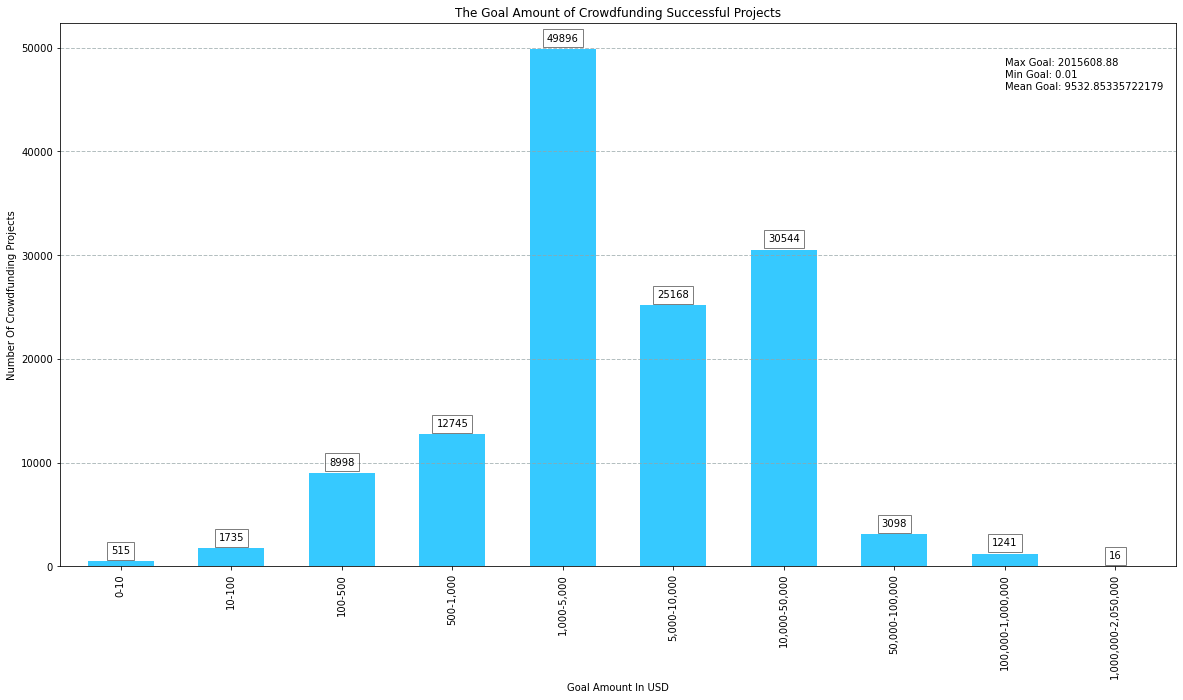

In [18]:
goal_values.plot(kind='bar',figsize=(20,10),color='#36c9ff',width=0.6) 
plt.title("The Goal Amount of Crowdfunding Successful Projects")
plt.xlabel("Goal Amount In USD")
plt.ylabel("Number Of Crowdfunding Projects")
plt.text(8, 46000, f'Max Goal: {max_goal}\nMin Goal: {min_goal}\nMean Goal: {mean_goal}')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
value_labels(goal_values,goal_values)
plt.show()

# 4 - Duration Of Fundraising

creating a new column that takes subtraction of two columns that gives the days set for fundraising

In [19]:
kick_df['time']=(kick_df['deadline']-kick_df['launched']).dt.days

using mathematical/ statistical functions to calculate, and saving them into variables

In [20]:
mu=round(kick_df[state_s]['time'].mean(),2)
sigma=round(kick_df[state_s]['time'].std(),2)
mode=kick_df[state_s]['time'].mode().max()

creating a histogram that shows the number of projects in each category of time in successful projects, and setting the design for the chart

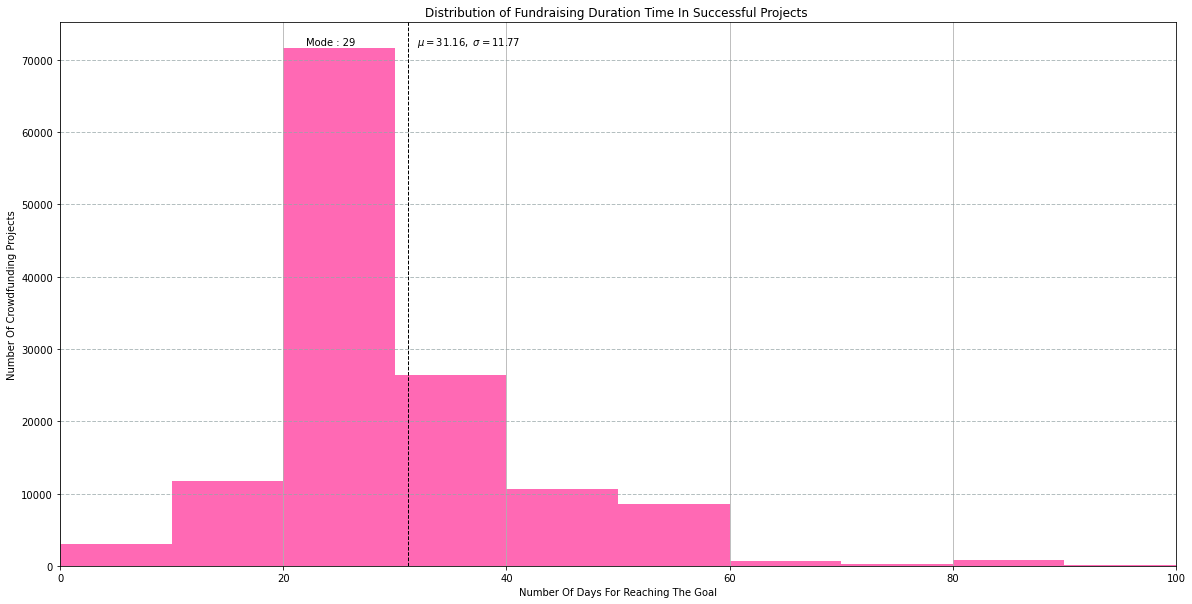

In [21]:
kick_df[state_s]['time'].hist(color='hotpink',figsize=(20,10),range=[0,100])
plt.title("Distribution of Fundraising Duration Time In Successful Projects ")
plt.xlabel("Number Of Days For Reaching The Goal")
plt.ylabel("Number Of Crowdfunding Projects")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xlim(0,100)
plt.text(32, 72000, f'$\mu={mu},\ \sigma={sigma}$')
plt.text(22, 72000, f'Mode : {mode}')
plt.axvline(kick_df[state_s]['time'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

# 5 - Raised Amount vs. Goal Amount

creating a bar chart that shows the raised amount vs. goal amount of money in each main category in successful projects, by grouping data and using the 'mean' function, and setting the design for the chart

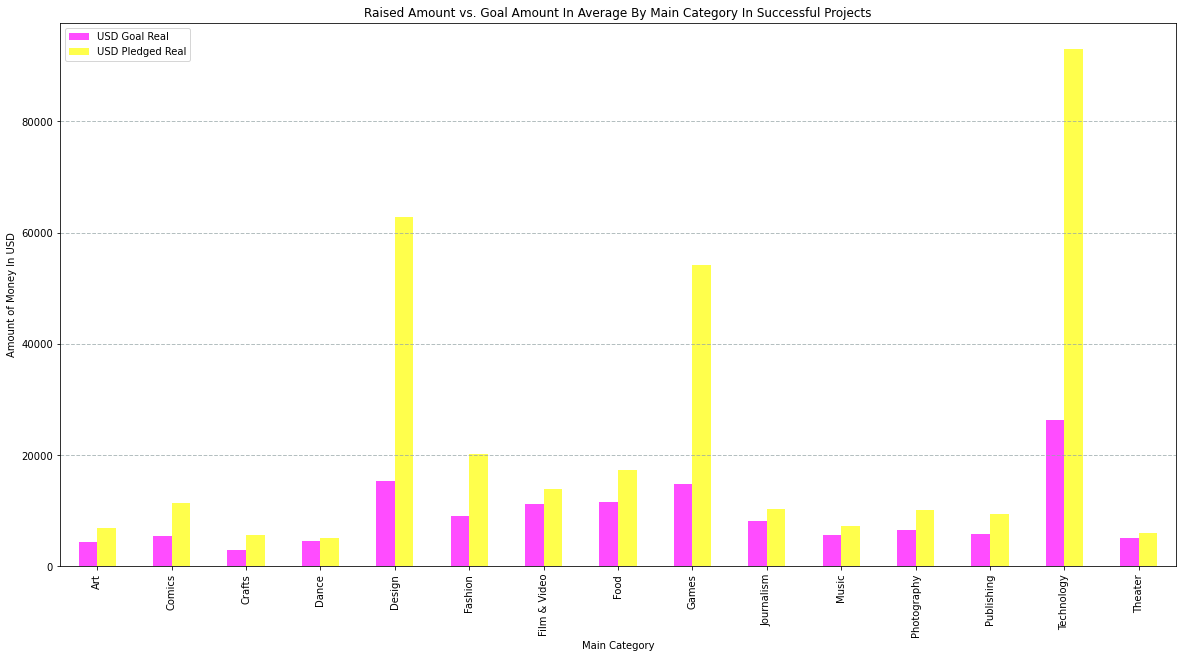

In [22]:
kick_df[state_s].groupby('main_category')[['usd_goal_real','usd_pledged_real']].mean().plot(kind='bar',figsize=(20,10),colormap='spring',alpha=0.7)
plt.title("Raised Amount vs. Goal Amount In Average By Main Category In Successful Projects")
plt.xlabel("Main Category")
plt.ylabel("Amount of Money In USD")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.legend(["USD Goal Real", "USD Pledged Real"]);

# 6 - Fundraising Duration vs. Fundraising Amount

setting variables for scatter plot

In [23]:
x=kick_df[state_s]['time']
y=kick_df[state_s]['usd_pledged_real']

creating scatter plot to see if there is correlation between the two variables in successful projects, and setting the design for the chart

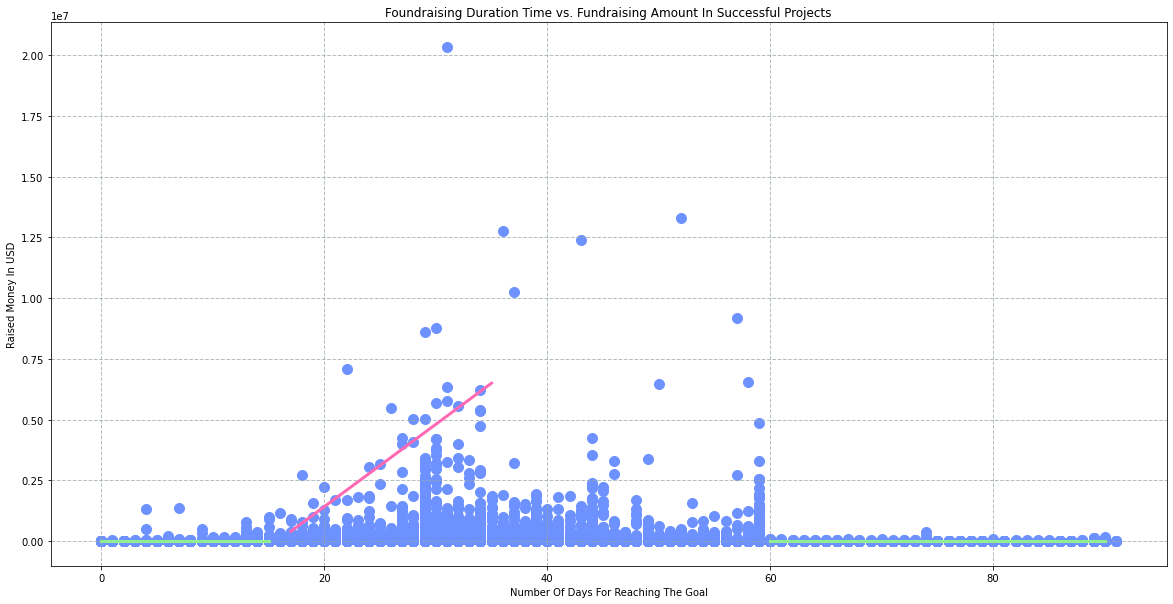

In [24]:
plt.figure(figsize=(20, 10))
plt.scatter(x=x,y=y,s=100, c='#6d92ff')
plt.plot([17,35], [400000, 6500000],c='hotpink',linewidth=3)
plt.plot([0,15],[0,0],c='lightgreen',linewidth=3)
plt.plot([60,90],[0,0], c='lightgreen',linewidth=3)
plt.title("Foundraising Duration Time vs. Fundraising Amount In Successful Projects")
plt.xlabel("Number Of Days For Reaching The Goal")
plt.ylabel("Raised Money In USD")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='both', alpha=0.7)
plt.show()

# 7 -  Success Rate In Projects 

creating 3 columns that related to calculating success rate

In [25]:
kick_df['success_rate']=(kick_df['usd_pledged_real']/kick_df['usd_goal_real'])*100
kick_df['success_rate_above']=((kick_df['success_rate']/100)-1)*100
kick_df['success_rate_100']=(kick_df['usd_goal_real']/kick_df['usd_goal_real'])*100

creating a new variable for the values of each bar chart, which are the future labels

In [26]:
successrate_values=round(kick_df[state_s].groupby('main_category')['success_rate'].mean(),2)

changing the variable we set before to use the function we already did 

In [27]:
distance=5

creating a bar chart that shows the success rate in each main category in successful projects, by grouping data and using the 'mean' function, and setting the design for the chart

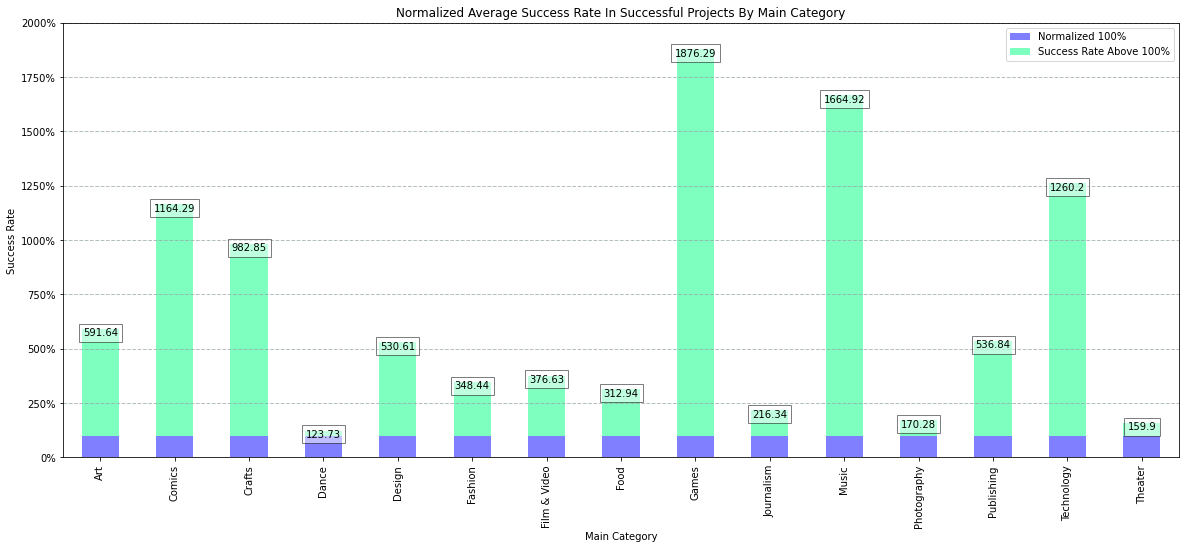

In [28]:
kick_df[state_s].groupby('main_category')[['success_rate_100','success_rate_above']].mean().plot(kind='bar',figsize=(20,8),colormap='winter',alpha=0.5,stacked=True)
plt.title("Normalized Average Success Rate In Successful Projects By Main Category")
plt.xlabel("Main Category")
plt.ylabel("Success Rate")
plt.ylim(0,2000)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.legend(["Normalized 100%", "Success Rate Above 100%"]);
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
value_labels(successrate_values, successrate_values)
plt.show()

# 8- Project Name Length

creating function that checks the length of project name and classifying it by our categories

In [29]:
def how_long(name):

    if len(name)==0:
        return "No Name"

    elif len(name)>0 and len(name)<10:
        return "Very Short"

    elif len(name)>10 and len(name)<20:
        return "Short"

    elif len(name)>20 and len(name)<40:
        return "Medium"

    elif len(name)>40 and len(name)<60:
        return "Long"

    elif len(name)>60 and len(name)<80:
        return "Very Long"
    
    elif len(name)>80 :
        return "Extra Long"

applying the function while creating new column

In [30]:
kick_df['name_length']=kick_df['name'].apply(how_long)

creating a horizontal bar chart that shows the number of projects in each length category we made in successful projects by counting, and setting the design for the chart

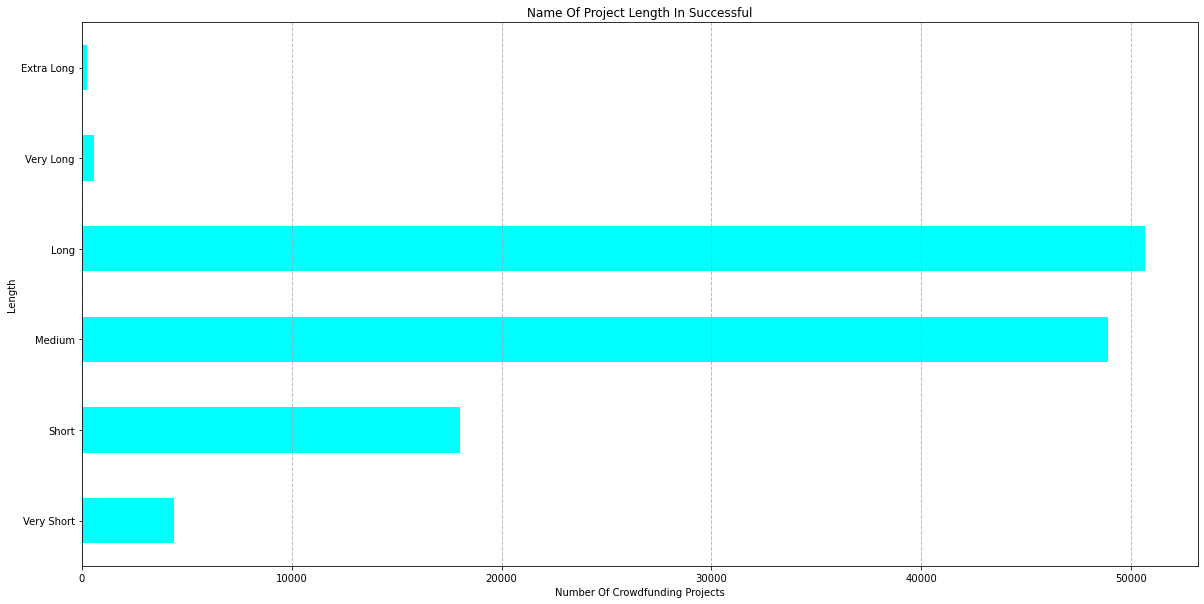

In [31]:
kick_df[state_s]['name_length'].value_counts().reindex(["Very Short", "Short", "Medium", "Long" , "Very Long","Extra Long"]).plot(kind="barh",figsize=(20,10),color='aqua')
plt.title("Name Of Project Length In Successful")
plt.xlabel("Number Of Crowdfunding Projects")
plt.ylabel("Length")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.show()

# 9 - Kickstarter  Vs. Indiegogo Projects Launched Projects Over The Years

creating a test to check if the file exists

In [32]:
if os.path.isfile(indiegogo_file)==False:
     raise(Exception("IndieGoGo's File Not Found"))

loading file

In [33]:
indiegogo_df=pd.read_csv(indiegogo_file)

cleaning columns titles & removing empty rows

In [34]:
indiegogo_df.columns=indiegogo_df.columns.str.strip() 
indiegogo_df.dropna(how='all',axis='rows', inplace=True )

determining type for certain colunmns

In [35]:
indiegogo_df['date_launch']=pd.to_datetime(indiegogo_df['date_launch'])
indiegogo_df['date_end']=pd.to_datetime(indiegogo_df['date_end'])

Removing irrelevant columns

In [36]:
indiegogo_df.drop(indiegogo_df.iloc[:,2:6], axis = 1, inplace = True)
indiegogo_df.drop(indiegogo_df.iloc[:,4:9], axis = 1, inplace = True)
indiegogo_df.drop(indiegogo_df.columns[7], axis = 1, inplace = True)
indiegogo_df.drop(indiegogo_df.iloc[:,12:64], axis = 1, inplace = True)

creating new column in each dataframe that takes the date in month/year format

In [37]:
kick_df['month_in_year']=kick_df['launched'].dt.to_period('M')
indiegogo_df['month_in_year']=indiegogo_df['date_launch'].dt.to_period('M')

creating two line plots that show the number of projects launched in each platform over time by counting, and setting the design for them

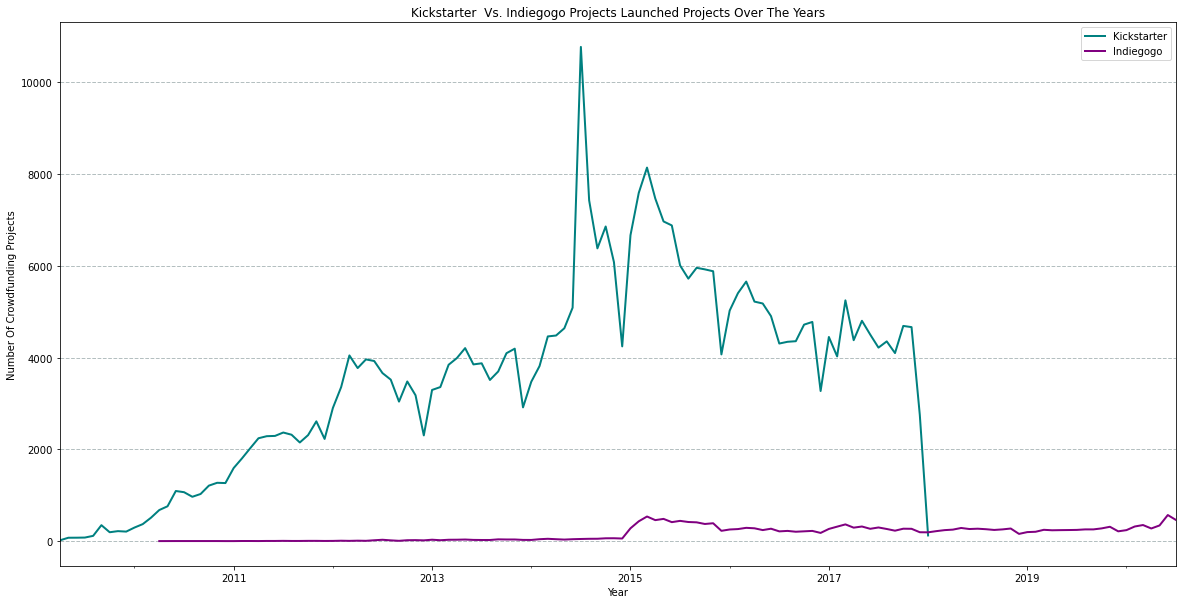

In [38]:
kick_df['month_in_year'].value_counts().sort_index().plot(title='Launched Projects',label='Kickstarter', figsize=(20, 10), color='teal',lw=2)
indiegogo_df['month_in_year'].value_counts().sort_index().plot(title='Launched Projects',label='Indiegogo', figsize=(20, 10), color='purple',lw=2)
plt.legend()
plt.title("Kickstarter  Vs. Indiegogo Projects Launched Projects Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Crowdfunding Projects")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

calculating the month that had the highest number of launched projects on Kickstarter

In [39]:
kick_df['month_in_year'].value_counts().idxmax()

Period('2014-07', 'M')

calculating the month that had the highest number of launched projects on Indiegogo

In [40]:
indiegogo_df['month_in_year'].value_counts().idxmax()

Period('2020-06', 'M')

# 10 -Kickstarter  Vs. Indiegogo Success Rate

changing the type of 'funded_percent' column from string to float to compare it to Kickstarter 'success_rate' column

In [41]:
indiegogo_df['funded_percent']=(indiegogo_df['funded_percent'].str.replace("%","")).astype(float)

creating mask for successful projects in Indiegogo dataframe

In [42]:
indi_state_s=indiegogo_df['state']==1

creating two line plots that show the success rate of successful projects in each platform over time, by grouping data and using the 'mean' function,and setting the design for them

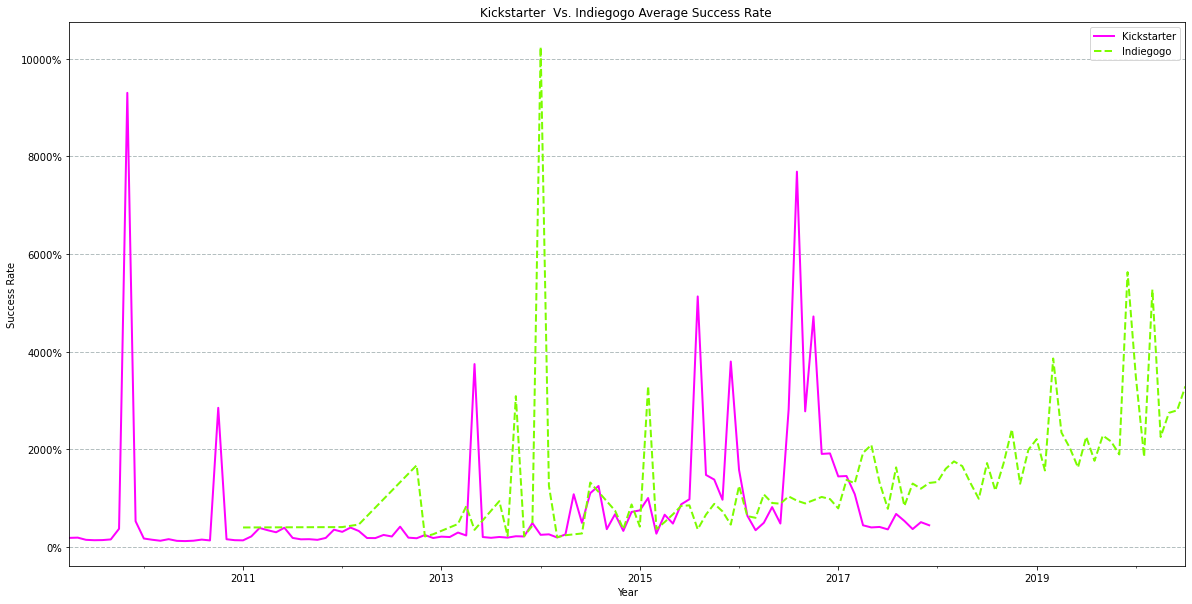

In [43]:
kick_df[state_s].groupby('month_in_year')['success_rate'].mean().plot(kind='line',label='Kickstarter',figsize=(20, 10),color="fuchsia",lw=2)
indiegogo_df[indi_state_s].groupby('month_in_year')['funded_percent'].mean().plot(kind='line',label='Indiegogo',figsize=(20, 10),color="lawngreen",ls="--",lw=2)
plt.legend()
plt.title("Kickstarter  Vs. Indiegogo Average Success Rate ")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.show()

# 11 -Kickstarter  Vs. Indiegogo Raised Amount In Successful Projects

creating two line plots that show the amount of money raised in successful projects in each platform over time, by grouping data and using the 'sum' function,and setting the design for them

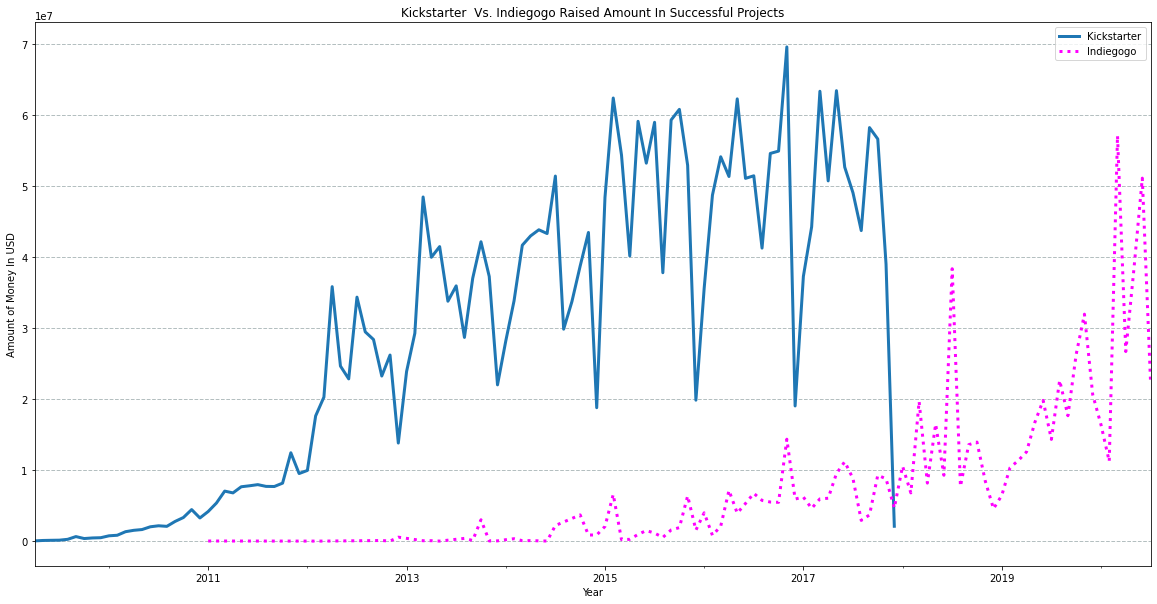

In [44]:
kick_df[state_s].groupby('month_in_year')['usd_pledged_real'].sum().plot(kind='line',label='Kickstarter',figsize=(20, 10),lw=3)
indiegogo_df[indi_state_s].groupby('month_in_year')['amount_raised_usd'].sum().plot(kind='line',label='Indiegogo',figsize=(20, 10),color='fuchsia',ls=':',lw=3)
plt.legend()
plt.title("Kickstarter  Vs. Indiegogo Raised Amount In Successful Projects")
plt.xlabel("Year")
plt.ylabel("Amount of Money In USD")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

calculating the month that projects on Kickstarter raised the highest amount of money

In [45]:
kick_df.groupby('month_in_year')['usd_pledged_real'].sum().idxmax()

Period('2016-11', 'M')

calculating the month that projects on Indiegogo raised the highest amount of money

In [46]:
indiegogo_df.groupby('month_in_year')['amount_raised_usd'].sum().idxmax()

Period('2020-03', 'M')